# Word2Vec Demos

In [1]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the pre-trained word2vec model
model = api.load("word2vec-google-news-300")

In [2]:
model['hi'].shape

(300,)

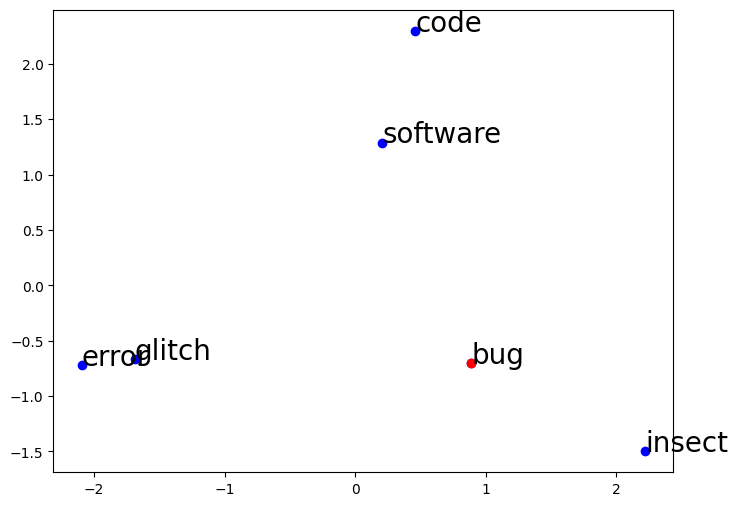

In [3]:
# Words to visualize
words = ['bug', 'insect', 'error', 'code', 'software', 'glitch']

# Extract the word vectors
vectors = np.array([model[word] for word in words])

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue')

for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=20)

# Change bug to red
plt.scatter(reduced_vectors[0, 0], reduced_vectors[0, 1], color='red')

plt.show()


In [4]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

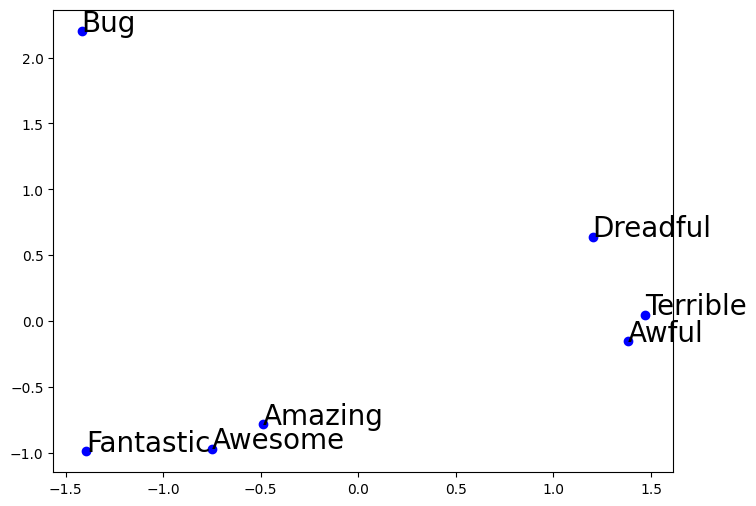

In [5]:
# Words to visualize
words = ['Fantastic', 'Awesome', 'Amazing', 'Dreadful', 'Terrible', 'Awful', 'Bug']

# Extract the word vectors
vectors = np.array([model[word] for word in words])

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)

reduced_vectors = pca.fit_transform(vectors)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue')

for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=20)

plt.show()


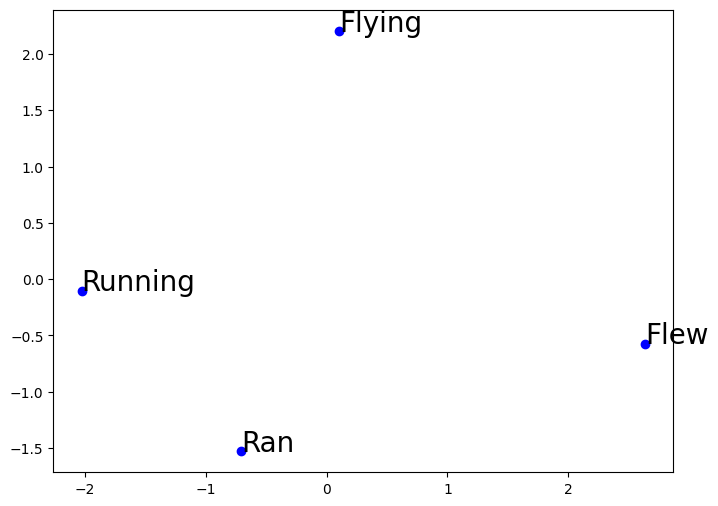

In [6]:
# Words to visualize
words = ['Flew', 'Flying', 'Ran', 'Running']

# Extract the word vectors
vectors = np.array([model[word] for word in words])

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)

reduced_vectors = pca.fit_transform(vectors)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue')

for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=20)

plt.show()


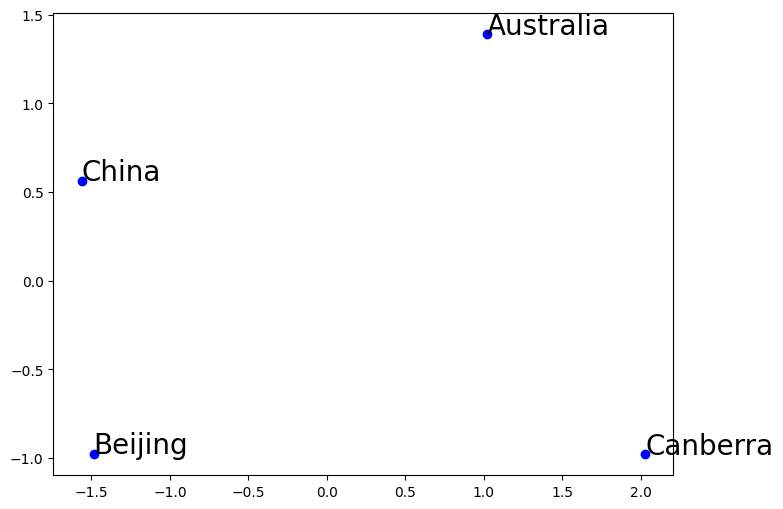

In [7]:
# Words to visualize
words = ['Australia', 'China', 'Canberra', 'Beijing']

# Extract the word vectors
vectors = np.array([model[word] for word in words])

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)

reduced_vectors = pca.fit_transform(vectors)

pca_components = pca.components_
pca_mean = pca.mean_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue')

for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=20)

plt.show()


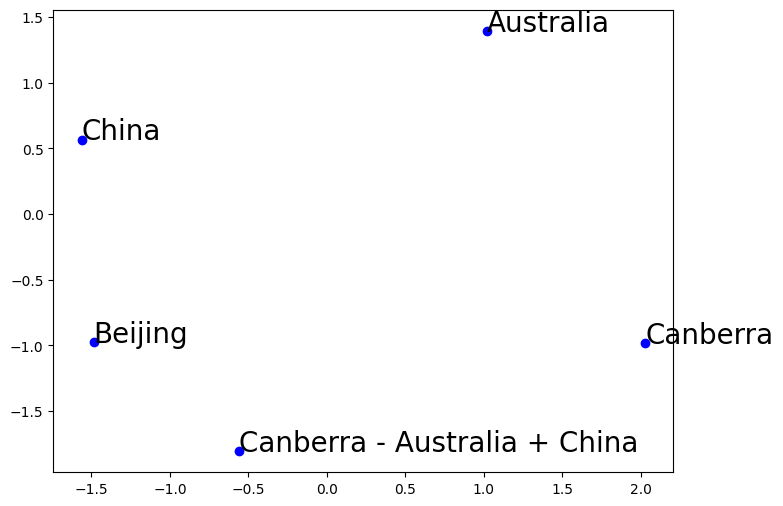

In [8]:
# Step 2: Perform vector arithmetic
result_vector = model['Canberra'] - model['Australia'] + model['China']

# Step 3: Project the result vector into the existing PCA space
def project_new_vector(new_vector):
    centered_vector = new_vector - pca_mean
    return np.dot(centered_vector, pca_components.T)

# Project the result vector into the PCA space
projected_result = project_new_vector(result_vector)
# Combine the reduced original vectors with the new projected result
all_reduced_vectors = np.vstack([reduced_vectors, projected_result])
words.append('Canberra - Australia + China')

# Step 4: Plotting
plt.figure(figsize=(8, 6))
plt.scatter(all_reduced_vectors[:, 0], all_reduced_vectors[:, 1], color='blue')

for i, word in enumerate(words):
    plt.annotate(word, (all_reduced_vectors[i, 0], all_reduced_vectors[i, 1]), fontsize=20)

plt.show()


In [18]:
# Perform vector arithmetic for Canberra - Australia + China
model.most_similar(model['Canberra'] - model['Australia'] + model['China'], topn=5)

[('Beijing', 0.742388904094696),
 ('China', 0.6592058539390564),
 ('Canberra', 0.6468576788902283),
 ('Chinese', 0.6212753057479858),
 ('Beijng', 0.6106800436973572)]

In [19]:
# Perform vector arithmetic for king - man + woman
model.most_similar(model['king'] - model['man'] + model['woman'], topn=5)

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916)]

# PyCon Speech Description Embeddings

In [20]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util, CrossEncoder

df = pd.read_csv('pycon_2024_sessions.csv')

# Load a pre-trained sentence transformer model
sbert_model = SentenceTransformer('all-mpnet-base-v2')

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-12-v2')
# Compute embeddings for all descriptions
embeddings = sbert_model.encode(df['Description'].tolist(), convert_to_tensor=True)

/home/lbluett/anaconda3/envs/ml/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/home/lbluett/anaconda3/envs/ml/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [21]:
# current_speech = df.loc[df['Title'] == 'Embeddings: How Computers Learned to Read—PyCon AU 2024'].index[0]
current_speech = 16

In [22]:
related_articles = util.semantic_search(embeddings, embeddings, top_k=11)

In [23]:
df['Description'][16]

"As large language models take over the world, we’re now working alongside machines that can read, write and converse – coding with CoPilot, chatting with ChatGPT and drawing with DALL-E. But how do machines, which fundamentally operate on binary code, achieve such remarkable feats? The answer lies in embeddings. Embeddings allow us to represent complex data - whether it's text, images, or even abstract concepts - as dense vectors of numbers. In this presentation, we'll demystify embeddings and give you a practical and intuitive understanding of how they work."

In [24]:
related_articles[0]

[{'corpus_id': 0, 'score': 1.0000001192092896},
 {'corpus_id': 56, 'score': 0.49006807804107666},
 {'corpus_id': 15, 'score': 0.4833514094352722},
 {'corpus_id': 29, 'score': 0.4181976318359375},
 {'corpus_id': 37, 'score': 0.38466009497642517},
 {'corpus_id': 6, 'score': 0.3662496507167816},
 {'corpus_id': 36, 'score': 0.3275807797908783},
 {'corpus_id': 47, 'score': 0.32603365182876587},
 {'corpus_id': 7, 'score': 0.32285377383232117},
 {'corpus_id': 52, 'score': 0.32064878940582275},
 {'corpus_id': 34, 'score': 0.3084678649902344}]

In [25]:
ids = [item['corpus_id'] for item in related_articles[0]]

In [26]:
ids

[0, 56, 15, 29, 37, 6, 36, 47, 7, 52, 34]

In [27]:
cross_inp = [[df.iloc[current_speech]['Description'], df.iloc[id]['Description']] for id in ids]

In [28]:
cross_inp

[["As large language models take over the world, we’re now working alongside machines that can read, write and converse – coding with CoPilot, chatting with ChatGPT and drawing with DALL-E. But how do machines, which fundamentally operate on binary code, achieve such remarkable feats? The answer lies in embeddings. Embeddings allow us to represent complex data - whether it's text, images, or even abstract concepts - as dense vectors of numbers. In this presentation, we'll demystify embeddings and give you a practical and intuitive understanding of how they work.",
  "Sick of writing lots of dedicated methods to perform the same tasks? Want to write less code? This talk may be for you! \nREST API's are ubiquitious, and a very useful way to send and recieve data from various services. However, building them can often feel repetitive and boring. So, because I was lazy, and sick of doing it I decided to override specific dunder methods to write less boiler plate code, and keep myself inter

In [29]:
cross_scores = cross_encoder.predict(cross_inp)

In [30]:
cross_scores

array([ -8.859953,  -9.41247 ,  -9.715124, -10.00865 , -10.166027,
        -8.917524, -10.194391,  -9.084074, -10.589603,  -9.662344,
        -9.557642], dtype=float32)

In [31]:
# Sort results by the cross-encoder scores
for idx in range(len(cross_scores)):
    related_articles[current_speech][idx]['cross-score'] = cross_scores[idx]

In [32]:
related_articles[current_speech]

[{'corpus_id': 16, 'score': 1.0000001192092896, 'cross-score': -8.859953},
 {'corpus_id': 5, 'score': 0.3740735948085785, 'cross-score': -9.41247},
 {'corpus_id': 34, 'score': 0.3543103039264679, 'cross-score': -9.715124},
 {'corpus_id': 28, 'score': 0.3408707082271576, 'cross-score': -10.00865},
 {'corpus_id': 2, 'score': 0.31406769156455994, 'cross-score': -10.166027},
 {'corpus_id': 30, 'score': 0.3039226233959198, 'cross-score': -8.917524},
 {'corpus_id': 25, 'score': 0.3038807511329651, 'cross-score': -10.194391},
 {'corpus_id': 45, 'score': 0.2998770475387573, 'cross-score': -9.084074},
 {'corpus_id': 12, 'score': 0.29523980617523193, 'cross-score': -10.589603},
 {'corpus_id': 11, 'score': 0.28234484791755676, 'cross-score': -9.662344},
 {'corpus_id': 17, 'score': 0.2650468051433563, 'cross-score': -9.557642}]

In [33]:
sorted(related_articles[current_speech], key=lambda x: x['cross-score'], reverse=True)

[{'corpus_id': 16, 'score': 1.0000001192092896, 'cross-score': -8.859953},
 {'corpus_id': 30, 'score': 0.3039226233959198, 'cross-score': -8.917524},
 {'corpus_id': 45, 'score': 0.2998770475387573, 'cross-score': -9.084074},
 {'corpus_id': 5, 'score': 0.3740735948085785, 'cross-score': -9.41247},
 {'corpus_id': 17, 'score': 0.2650468051433563, 'cross-score': -9.557642},
 {'corpus_id': 11, 'score': 0.28234484791755676, 'cross-score': -9.662344},
 {'corpus_id': 34, 'score': 0.3543103039264679, 'cross-score': -9.715124},
 {'corpus_id': 28, 'score': 0.3408707082271576, 'cross-score': -10.00865},
 {'corpus_id': 2, 'score': 0.31406769156455994, 'cross-score': -10.166027},
 {'corpus_id': 25, 'score': 0.3038807511329651, 'cross-score': -10.194391},
 {'corpus_id': 12, 'score': 0.29523980617523193, 'cross-score': -10.589603}]

In [34]:
for item in related_articles[current_speech]:
    print(f"Title: {df.iloc[item['corpus_id']]['Title']} - Cross-encoder Score: {item['score']}")

Title: Embeddings: How Computers Learned to Read—PyCon AU 2024 - Cross-encoder Score: 1.0000001192092896
Title: Avocado, Cheese, Grape, Tomato or: How I Used Python to Stop Worrying and Love Emoji in Bioinformatics—PyCon AU 2024 - Cross-encoder Score: 0.3740735948085785
Title: MicroPython: The best bits!—PyCon AU 2024 - Cross-encoder Score: 0.3543103039264679
Title: Introducing Potnia: A Python language library for the conversion of ancient texts to Unicode—PyCon AU 2024 - Cross-encoder Score: 0.3408707082271576
Title: AI perceptions of gender—PyCon AU 2024 - Cross-encoder Score: 0.31406769156455994
Title: Leveraging the Rich Spatiotemporal Features of live cell imaging with Machine Learning and AI—PyCon AU 2024 - Cross-encoder Score: 0.3039226233959198
Title: How Smart is AI? – Real projects to build real understanding—PyCon AU 2024 - Cross-encoder Score: 0.3038807511329651
Title: Teaching Digital Technologies in Australian schools with Python and the Kookaberry—PyCon AU 2024 - Cross-

In [35]:
for item in sorted(related_articles[current_speech], key=lambda x: x['cross-score'], reverse=True):
    print(f"Title: {df.iloc[item['corpus_id']]['Title']} - Cross-encoder Score: {item['cross-score']}")

Title: Embeddings: How Computers Learned to Read—PyCon AU 2024 - Cross-encoder Score: -8.859952926635742
Title: Leveraging the Rich Spatiotemporal Features of live cell imaging with Machine Learning and AI—PyCon AU 2024 - Cross-encoder Score: -8.917524337768555
Title: Teaching Digital Technologies in Australian schools with Python and the Kookaberry—PyCon AU 2024 - Cross-encoder Score: -9.084074020385742
Title: Avocado, Cheese, Grape, Tomato or: How I Used Python to Stop Worrying and Love Emoji in Bioinformatics—PyCon AU 2024 - Cross-encoder Score: -9.412469863891602
Title: Enhancing Programming Ability with Playful Learning and Karel—PyCon AU 2024 - Cross-encoder Score: -9.557641983032227
Title: Cultural and Linguistic Influences on Translation: A Study of Novels—PyCon AU 2024 - Cross-encoder Score: -9.662343978881836
Title: MicroPython: The best bits!—PyCon AU 2024 - Cross-encoder Score: -9.715124130249023
Title: Introducing Potnia: A Python language library for the conversion of anc

In [36]:
temp = df.iloc[ids]

In [37]:
temp

,Title,Name,Description
0,A Lazy Person's Guide to Building REST Clients...,Ash Bek,Sick of writing lots of dedicated methods to p...
56,What Python Can Learn From Other Languages—PyC...,Noah Kantrowitz,Python is great! It's been a mainstay of web d...
15,"Django, REST and OpenAPI - a gentle introducti...",Paul Wayper,Django is an all-parts-included framework that...
29,Let's make a working implementation of async f...,Christopher Neugebauer,Often I hear people lamenting that Python has ...
37,Performant Python—PyCon AU 2024,Anna Tisch,An introduction to writing performant Python c...
6,Better dataframes—PyCon AU 2024,Ed Schofield,Dataframes are an abstraction that proven extr...
36,Notes on Over-Engineering: A Project Post-Mort...,Sam Bishop,Join me for a retrospective on a reusable Djan...
47,The perfect setup? Not setup.py! Building pack...,Caleb Brown,Everyone loves package management! Python's pa...
7,Build Your Own IoT! Fun With Python and Raspbe...,A.J. Fisher,This talk will discuss building a basic stream...
52,Using Multiple Databases in Django Application...,Artem Kolesnikov,"Over six years ago, three engineers from Sydne..."


In [38]:
import streamlit as st
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch

# Load your data
df = pd.read_csv('pycon_2024_sessions.csv')  # Assuming you have the DataFrame from the previous step

# Load a pre-trained sentence transformer model
sbert_model = SentenceTransformer('all-mpnet-base-v2')

# Compute embeddings for all descriptions
embeddings = sbert_model.encode(df['Description'].tolist(), convert_to_tensor=True)
df['embedding'] = embeddings.tolist()

related_articles = util.semantic_search(embeddings, embeddings, top_k=11)

# Streamlit UI to select a title
selected_title = st.selectbox("Select a session title", df['Title'].values)

# Get the selected description
# selected_description = df[df['Title'] == selected_title]['Description'].values[0]

# get selected id
selected_id = df[df['Title'] == selected_title].index[0]

related_ids = [item['corpus_id'] for item in related_articles[selected_id][0]]

# Compute embedding for the selected description
# selected_embedding = sbert_model.encode(selected_description, convert_to_tensor=True)

# Compute cosine similarities between the selected description and all others
# cosine_similarities = util.pytorch_cos_sim(selected_embedding, embeddings).flatten()

# Find the top N most similar descriptions
N = st.slider("Number of similar sessions to display", 1, 10, 5)
top_n_indices = related_ids[1:N + 1]  # Skip the first as it's the selected one

# Display the most similar descriptions
st.write(f"Top {N} most similar sessions to '{selected_title}':")
for index in top_n_indices:
    index = int(index)  # Convert tensor index to int
    st.write(f"**{df.iloc[index]['Title']}**")
    st.write(df.iloc[index]['Description'])
    st.write("----")


2024-11-10 13:35:18.403 
  command:

    streamlit run /home/lbluett/anaconda3/envs/ml/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


TypeError: string indices must be integers, not 'str'